In [2]:
import numpy as np #linear algebra
import pandas as pd #data manipulation
import matplotlib.pyplot as plt #data viz
from matplotlib.gridspec import GridSpec #data viz
import seaborn as sns #data viz
import warnings #warnings
warnings.filterwarnings('ignore') #Hides warning popups

In [3]:
data = pd.read_csv('HepatitisCdata.csv')
data.head(10)

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
5,6,0=Blood Donor,32,m,41.6,43.3,18.5,19.7,12.3,9.92,6.05,111.0,91.0,74.0
6,7,0=Blood Donor,32,m,46.3,41.3,17.5,17.8,8.5,7.01,4.79,70.0,16.9,74.5
7,8,0=Blood Donor,32,m,42.2,41.9,35.8,31.1,16.1,5.82,4.60,109.0,21.5,67.1
8,9,0=Blood Donor,32,m,50.9,65.5,23.2,21.2,6.9,8.69,4.10,83.0,13.7,71.3
9,10,0=Blood Donor,32,m,42.4,86.3,20.3,20.0,35.2,5.46,4.45,81.0,15.9,69.9


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  615 non-null    int64  
 1   Category    615 non-null    object 
 2   Age         615 non-null    int64  
 3   Sex         615 non-null    object 
 4   ALB         614 non-null    float64
 5   ALP         597 non-null    float64
 6   ALT         614 non-null    float64
 7   AST         615 non-null    float64
 8   BIL         615 non-null    float64
 9   CHE         615 non-null    float64
 10  CHOL        605 non-null    float64
 11  CREA        615 non-null    float64
 12  GGT         615 non-null    float64
 13  PROT        614 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 67.4+ KB


In [5]:
data.describe()

,Unnamed: 0,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.000000,615.000000,614.000000,597.000000,614.000000,615.000000,615.000000,615.000000,605.000000,615.000000,615.000000,614.000000
mean,308.000000,47.408130,41.620195,68.283920,28.450814,34.786341,11.396748,8.196634,5.368099,81.287805,39.533171,72.044137
std,177.679487,10.055105,5.780629,26.028315,25.469689,33.090690,19.673150,2.205657,1.132728,49.756166,54.661071,5.402636
min,1.000000,19.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,154.500000,39.000000,38.800000,52.500000,16.400000,21.600000,5.300000,6.935000,4.610000,67.000000,15.700000,69.300000
50%,308.000000,47.000000,41.950000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,77.000000,23.300000,72.200000
75%,461.500000,54.000000,45.200000,80.100000,33.075000,32.900000,11.200000,9.590000,6.060000,88.000000,40.200000,75.400000
max,615.000000,77.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


In [12]:
target_map = {'0=Blood Donor': 'Healthy',
             '0s=suspect Blood Donor': 'Healthy', #suspects are binned with blood donors for simplicity
             '1=Hepatitis': 'Hepatitis',
             '2=Fibrosis': 'Fibrosis',
             '3=Cirrhosis': 'Cirrhosis'}

data['Category'] = data.Category.map(target_map)

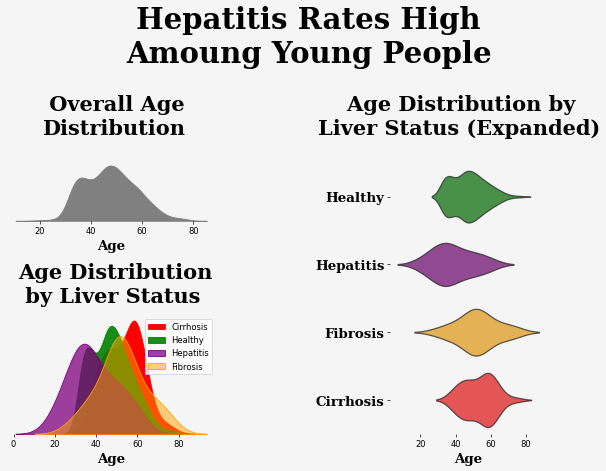

In [13]:
fig = plt.figure(figsize = (20,8), dpi = 60)
gs = GridSpec(ncols=10, nrows=12, left=0.05, right=0.5, wspace=0.2, hspace=0.1)
fig.patch.set_facecolor('#f5f5f5')
sns.set_palette(sns.color_palette(['green','purple', 'orange', 'red']))

ax1 = fig.add_subplot(gs[3:5, 0:4])
ax2 = fig.add_subplot(gs[8:, 0:4])
ax3 = fig.add_subplot(gs[3:, 7:])

# axes list
axes = [ ax1,ax2, ax3]

# setting of axes; visibility of axes and spines turn off
for ax in axes:
    ax.axes.get_yaxis().set_visible(False)
    ax.set_facecolor('#f5f5f5')
    
    for loc in ['left', 'right', 'top', 'bottom']:
        ax.spines[loc].set_visible(False)



#-------Ax 1------------------------------------------------
sns.kdeplot('Age', data=data, ax=ax1, shade=True, color='grey', alpha=1)
ax1.set_xlabel('Age', {'font':'Serif', 'fontsize':16,'fontweight':'bold', 'color':'black'})

#-------Ax 2------------------------------------------------
sns.kdeplot('Age', data=data[data.Category=='Cirrhosis'], ax=ax2, shade=True, color='red', alpha=1, label='Cirrhosis')
sns.kdeplot('Age', data=data[data.Category=='Healthy'], ax=ax2, shade=True, color='green', alpha=0.9, label='Healthy')
sns.kdeplot('Age', data=data[data.Category=='Hepatitis'], ax=ax2, shade=True, color='purple', alpha=0.75, label='Hepatitis')
sns.kdeplot('Age', data=data[data.Category=='Fibrosis'], ax=ax2, shade=True, color='orange', alpha=0.5, label='Fibrosis')

ax2.legend()
ax2.set_xlabel('Age', {'font':'Serif', 'fontsize':16,'fontweight':'bold', 'color':'black'})


#-------Ax 3------------------------------------------------
ax3_plot = sns.violinplot(x='Age', y='Category', data=data,  ax=ax3, aspect=2, inner=None)
for item in ax3_plot.collections[::]:
    item.set_alpha(0.75)
ax3.axes.get_yaxis().set_visible(True)
ax3.set_ylabel('')
ax3.set_yticklabels( labels = ['Healthy', 'Hepatitis', 'Fibrosis', 'Cirrhosis'],
                fontdict = {'font':'Serif', 'fontsize':16,'fontweight':'bold', 'color':'black'})
ax3.set_xlabel('Age', {'font':'Serif', 'fontsize':16,'fontweight':'bold', 'color':'black'})
#----------------------------------------------------------------------------
#axes titles
#ax1
fig.text(0.08, 0.75, " Overall Age\nDistribution",
        {'font':'Serif', 'fontsize':25,'fontweight':'bold', 'color':'black'})
#ax2
fig.text(0.06, 0.4, "Age Distribution\n by Liver Status",
        {'font':'Serif', 'fontsize':25,'fontweight':'bold', 'color':'black'})
#ax3
fig.text(0.31, 0.75, "    Age Distribution by\nLiver Status (Expanded)",
        {'font':'Serif', 'fontsize':25,'fontweight':'bold', 'color':'black'})

fig.text(0.15, 0.9, " Hepatitis Rates High\nAmoung Young People",
        {'font':'Serif', 'fontsize':35,'fontweight':'bold', 'color':'black'})#title

plt.show()

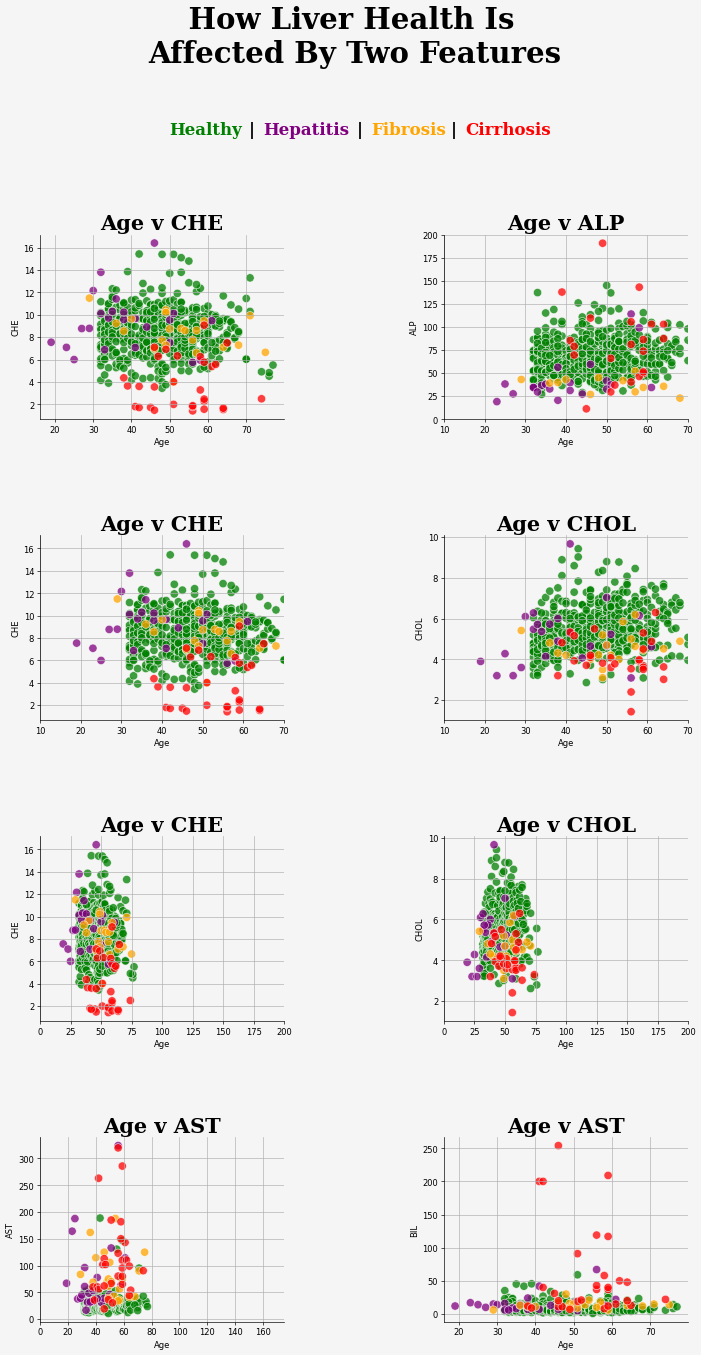

In [14]:
fig = plt.figure(figsize = (24,24), dpi = 60)
gs = GridSpec(ncols=13, nrows=29, left=0.05, right=0.5, wspace=0.2, hspace=0.1)
fig.patch.set_facecolor('#f5f5f5')
sns.set_palette(sns.color_palette(['green','purple', 'orange', 'red']))

ax1 = fig.add_subplot(gs[:5, :5])
ax2 = fig.add_subplot(gs[:5, 8:])
ax3 = fig.add_subplot(gs[8:13, :5])
ax4 = fig.add_subplot(gs[8:13, 8:])
ax5 = fig.add_subplot(gs[16:21, :5])
ax6 = fig.add_subplot(gs[16:21, 8:])
ax7 = fig.add_subplot(gs[24:, :5])
ax8 = fig.add_subplot(gs[24:, 8:])


# axes list
axes = [ ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8]

# setting of axes; visibility of axes and spines turn off
for ax in axes:
    ax.set_facecolor('#f5f5f5')
    ax.grid()
    
    for loc in ['right', 'top']:
        ax.spines[loc].set_visible(False)
        

#-------------------------------------------------------------------------------
#ax1 Age v CHE
sns.scatterplot(x='Age', y='CHE', hue='Category', data=data, ax=ax1, s=100, alpha=0.75, legend=None)
ax1.set_title('Age v CHE', {'font':'Serif', 'weight':'bold','color': 'black', 'size':25})
#-------------------------------------------------------------------------------
#ax2 ALB v ALP
sns.scatterplot(x='Age', y='ALP', hue='Category', data=data, ax=ax2, s=100, alpha=0.75, legend=None)
ax2.set_title('Age v ALP', {'font':'Serif', 'weight':'bold','color': 'black', 'size':25})
ax2.set_xlim(10, 70)
ax2.set_ylim(0,200)
#-------------------------------------------------------------------------------
#ax3 ALB v CHE
sns.scatterplot(x='Age', y='CHE', hue='Category', data=data, ax=ax3, s=100, alpha=0.75, legend=None)
ax3.set_title('Age v CHE', {'font':'Serif', 'weight':'bold','color': 'black', 'size':25})
ax3.set_xlim(10, 70)
#-------------------------------------------------------------------------------
#ax4 ALB v CHOL
sns.scatterplot(x='Age', y='CHOL', hue='Category', data=data, ax=ax4, s=100, alpha=0.75, legend=None)
ax4.set_title('Age v CHOL', {'font':'Serif', 'weight':'bold','color': 'black', 'size':25})
ax4.set_xlim(10, 70)
#-------------------------------------------------------------------------------
#ax5 ALP v CHE
sns.scatterplot(x='Age', y='CHE', hue='Category', data=data, ax=ax5, s=100, alpha=0.75, legend=None)
ax5.set_title('Age v CHE', {'font':'Serif', 'weight':'bold','color': 'black', 'size':25})
ax5.set_xlim(0, 200)
#-------------------------------------------------------------------------------
#ax6 ALP v CHOL
sns.scatterplot(x='Age', y='CHOL', hue='Category', data=data, ax=ax6, s=100, alpha=0.75, legend=None)
ax6.set_title('Age v CHOL', {'font':'Serif', 'weight':'bold','color': 'black', 'size':25})
ax6.set_xlim(0, 200)
#-------------------------------------------------------------------------------
#ax7 ALT v AST
sns.scatterplot(x='Age', y='AST', hue='Category', data=data, ax=ax7, s=100, alpha=0.75, legend=None)
ax7.set_title('Age v AST', {'font':'Serif', 'weight':'bold','color': 'black', 'size':25})
ax7.set_xlim(0, 175)
#-------------------------------------------------------------------------------
#ax8 AST v BIL
sns.scatterplot(x='Age', y='BIL', hue='Category', data=data, ax=ax8, s=100, alpha=0.75, legend=None)
ax8.set_title('Age v AST', {'font':'Serif', 'weight':'bold','color': 'black', 'size':25})
#ax8.set_xlim(0, 175)


#-------------------------------------------
fig.text(0.1 + 0.04, 0.95, "Healthy", 
         {'font':'Serif', 'weight':'bold','color': 'green', 'size':20})
fig.text(0.155 + 0.04, 0.95, "|", 
         {'font':'Serif', 'weight':'bold','color': 'black', 'size':20})
fig.text(0.165 + 0.04, 0.95, "Hepatitis", 
         {'font':'Serif', 'weight':'bold','color': 'purple', 'size':20})
fig.text(0.23 + 0.04, 0.95, "|", 
         {'font':'Serif', 'weight':'bold','color': 'black', 'size':20})
fig.text(0.24 + 0.04, 0.95, "Fibrosis", 
         {'font':'Serif', 'weight':'bold','color': 'orange', 'size':20})
fig.text(0.295 + 0.04, 0.95, "|", 
         {'font':'Serif', 'weight':'bold','color': 'black', 'size':20})
fig.text(0.305 + 0.04, 0.95, "Cirrhosis", 
         {'font':'Serif', 'weight':'bold','color': 'red', 'size':20})


fig.text(0.125, 1, "    How Liver Health Is\nAffected By Two Features", 
         {'font':'Serif', 'weight':'bold','color': 'black', 'size':35})
plt.show()

In [15]:
table = data.loc[data.ALB <= 30,'Category'].tolist()
len(table)

24